<a href="https://colab.research.google.com/github/titsitits/Python_Data_Science/blob/master/Completed_notebooks/7_Machine_Learning_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mickaël Tits
CETIC
mickael.tits@cetic.be

# Chapitre 7 - Introduction au Machine Learning

Un sous-domaine important de l'analyse de données est le machine learning (apprentissage automatique). Le machine learning regroupe un ensemble de techniques permettant, à partir des données, d'apprendre automatiquement différents types de relations entre les variables.

On distingue généralement:
* Le machine learning **supervisé**, qui permet d'apprendre des relations entre les données et des labels. Plus spécifiquement, on entraîne généralement un algorithme à prédire les labels (aussi appelés **variables dépendantes**, ou **targets**) un ensemble de variables (appelées **variables prédictives**, ou **features**). Un modèle consiste en un algorithme doté de **paramètres** et qui, à partir d'opérations entre les paramètres et les variables prédictives, prédit un nouveau label. L'apprentissage consiste alors à modifier les paramètres du modèle de manière à ce que les labels prédits soient les plus proches des labels réels. Autrement dit, on **minimise l'erreur moyenne des prédictions**. Cette minimisation de l'erreur se fait généralement par de manière itérative, par **descente de gradient**.

  Il existe deux applications principales de l'apprentissage supervisé:
  
  * La **classification**: on a un ensemble de données, par exemple des images, à partir desquelles on aimerait prédire une classe: le **label** de chaque image est alors une variable catégorielle, par exemple "chat" ou "chien". Les **variables prédictives** permettant d'entraîner l'algorithme sont par exemple les pixels des images, ou des relations entre ces pixels.
  
  * La **régression**: le **label** à prédire à partir des données est une valeur continue: par exemple le prix d'une maison, qu'on peut prédire à partir de différentes caractéristiques, ou l'âge d'une personne à prédire à partir d'une image.

* Le machine learning **non-supervisé**, qui permet d'apprendre des relations entre différentes données, telles que les similitudes entre différentes variables, ou différentes données (e.g.: Clustering, Réduction de dimensions).


Chargez d'abord le dataframe préparé lors du chapitre précédent.

In [1]:
import pandas as pd

#Si vous venez d'exécuter le notebook précédent, vous pouvez simplement récupérer le fichier temporaire créé.
#df = pd.read_csv("houses_features.csv", index_col = 0)

#Vous pouvez aussi récupérer une version du fichier hébergée ici:
df = pd.read_csv("https://raw.githubusercontent.com/titsitits/Python_Data_Science/master/Donn%C3%A9es/houses_features.csv", index_col = 0)
dfbxl = df[df.city == "Bruxelles"]
df

,address,price,rooms,surface,website,city,price_per_m2,price_per_room
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb,Namur,2666.666667,100000.000000
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb,Bruxelles,3333.333333,133333.333333
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb,Fleurus,1031.250000,66000.000000
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb,Fleurus,1352.941176,76666.666667
10,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immovlan,Namur,1750.000000,87500.000000
12,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb,Bruxelles,2333.333333,93333.333333
13,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan,Bruxelles,2666.666667,100000.000000
14,"Rue de la Loi 53, Bruxelles",480000.0,5.0,170,immovlan,Bruxelles,2823.529412,96000.000000
15,"Rue de Fer 27, Namur",280000.0,3.0,140,immoweb,Namur,2000.000000,93333.333333
16,"Rue de Fer 28, Namur",320000.0,4.0,160,immoweb,Namur,2000.000000,80000.000000


# Prédiction du prix d'une maison

## Préparation du dataset

In [0]:
#L'adresse n'a pas d'intérêt (on a déjà extrait la ville, qui est une catégorie intéressante)
dataset = df.drop("address",axis=1)
#dataset = dfbxl.drop("address",axis=1)


De nombreux algorithmes de machine learning nécessitent l'utilisation exclusive de **variables prédictives numériques**. En effet, ces algorithmes se basent entièrement sur des opérations algébriques à partir de ces variables pour prédire la variable dépendante.
Afin de pouvoir utiliser l'information contenue dans les variables catégorielles, il existe différentes techniques pour les transformer en variables continues:

* **One-hot encoding** (dummy variable extraction): Pour chaque catégorie possible d'une variable catégorielle, on crée une variable binaire, indiquant si l'échantillon est de cette catégorie ou non. Par exemple, la variable "`Ville`" ["Bruxelles" ou "Namur"] peut être simplement transformée en une variable binaire "`is_bruxelles`": "Bruxelles" => 1, "Namur" => 0

  Si `Ville` contient trois possibilités (e.g., ["Bruxelles" ou "Namur" ou "Fleurus"]), elle nécessitera la création de variables binaires, e.g.: `is_bruxelles` et `is_namur`. Pour chaque observation, une seule des deux variables ne peut être à 1 (puisque la variable `Ville` ne peut être qu'une ville à la fois). Si les deux sont fausses, c'est que la ville est Fleurus.
  
  De manière générale, une variable à n catégories nécessitera la création de n-1 variables binaires. On appelle généralement ces variables **dummy**.
  
* **Echelle** : certaines variables sont ordinale, comme `quality` [`bien`, `moyen`, `mauvais`]. Celle-ci peut être directement transformée un variable numérique: [bien => 0, moyen = >1, mauvais => 2]. Si ce n'est pas le cas, l'interprétation sémantique de la variable, et sa combinaison avec une autre variable continue permet de définir une échelle. Par exemple, on peut extraire certaines caractéristiques numériques d'une ville à partir du prix moyen des maisons, ou du nombre d'habitants: ["Bruxelles" => 300000, "Namur" => 250000, "Fleurus" => 200000].




In [3]:
#One-hot encoding des variables catégorielles
dataset = pd.get_dummies(dataset, drop_first=True)
dataset

,price,rooms,surface,price_per_m2,price_per_room,website_immoweb,city_Fleurus,city_Namur
0,400000.0,4.0,150,2666.666667,100000.000000,1,0,1
2,400000.0,3.0,120,3333.333333,133333.333333,1,0,0
4,330000.0,5.0,320,1031.250000,66000.000000,1,1,0
6,230000.0,3.0,170,1352.941176,76666.666667,1,1,0
10,350000.0,4.0,200,1750.000000,87500.000000,0,0,1
12,280000.0,3.0,120,2333.333333,93333.333333,1,0,0
13,400000.0,4.0,150,2666.666667,100000.000000,0,0,0
14,480000.0,5.0,170,2823.529412,96000.000000,0,0,0
15,280000.0,3.0,140,2000.000000,93333.333333,1,0,1
16,320000.0,4.0,160,2000.000000,80000.000000,1,0,1


In [4]:
dataset.corr()

,price,rooms,surface,price_per_m2,price_per_room,website_immoweb,city_Fleurus,city_Namur
price,1.000000,0.540790,-0.040486,0.670604,0.452047,-0.536105,-0.471232,-0.098653
rooms,0.540790,1.000000,0.635903,-0.186823,-0.484037,-0.563621,0.054074,0.104713
surface,-0.040486,0.635903,1.000000,-0.714090,-0.652439,-0.058931,0.665578,-0.085399
price_per_m2,0.670604,-0.186823,-0.714090,1.000000,0.883056,-0.144850,-0.718931,-0.142938
price_per_room,0.452047,-0.484037,-0.652439,0.883056,1.000000,0.094077,-0.516111,-0.228400
website_immoweb,-0.536105,-0.563621,-0.058931,-0.144850,0.094077,1.000000,0.356348,-0.069007
city_Fleurus,-0.471232,0.054074,0.665578,-0.718931,-0.516111,0.356348,1.000000,-0.430331
city_Namur,-0.098653,0.104713,-0.085399,-0.142938,-0.228400,-0.069007,-0.430331,1.000000


## Une framework Python de référence pour le machine learing: Scikit-learn

Une librairie Python incontournable pour le machine learning est la librairie Scikit-learn: https://scikit-learn.org/stable/ .

Elle inclut un geand nombre d'algorithmes de machine learning supervisé, non-supervisé, de préprocessing de caractéristiques, et de sélection de modèles de machine learning. L'API est assez simple, et est basée sur les librairies vues précédemment (Numpy, Scipy, Matplotlib).

La librairie contient de nombreuses classes permettant d'instancier des modèles de machine learning, que l'on peut ensuite utiliser pour: 
1. Entraîner sur un ensemble de **données d'entraînement (ou training set)**.

2. Chaque modèle contient généralement différents paramètres qui peuvent être adaptés aux données utilisées, afin d'améliorer les performances de l'algorithme. Pour vérifier les performances du modèles selon différents paramètres, on teste le modèle sur un set de **données de validation (ou validation set)**. On parle généralement de processus de **cross-validation**.

3. Afin de vérifier que le modèle obtenu est efficace, on peut ensuite le tester avec de nouvelles données (autres que celles utilisées durant l'entraînement et la cross-validation), les **données de test (ou test set)**.

### Régression linéaire

Etant donné le peu de données de l'exemple, on utilisera un modèle simple (régression linéaire), avec un nombre restreint de caractéristiques (surface, rooms, et éventuellement la ville). On ne contentera d'un training set et d'un test set (pas de validation ici: on gardera les paramètres par défaut du modèle).

In [0]:
from sklearn.linear_model import LinearRegression

#On crée un objet de la classe LinearRegression
regressor = LinearRegression()


In [0]:
trainsize = 6

trainset = dataset.iloc[:trainsize]
testset = dataset.iloc[trainsize:]

features = ["surface","rooms"]
#Pour tester un autre set de features, décommenter la ligne suivante
features = ["surface","rooms","city_Fleurus","city_Namur"]

Xtrain, ytrain, Xtest, ytest = trainset[features], trainset["price"], testset[features], testset["price"]

#### Entraînement

In [7]:
regressor.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Prédictions

In [8]:
trainpred = regressor.predict(Xtrain)
testpred = regressor.predict(Xtest)
print(testpred[0], ytest.values[0])

434999.9999999971 400000.0


In [9]:
regressor.coef_

array([ -1000., 125000., -60000., -35000.])

#### Evaluation des prédictions

In [10]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(trainpred,ytrain)
mae_test = mean_absolute_error(testpred,ytest)

mae_train, mae_test

(20000.000000003245, 62999.99999999812)

In [11]:
trainpred

array([400000.        , 339999.99999999, 330000.00000001, 230000.        ,
       350000.        , 339999.99999999])

In [12]:
testpred

array([435000., 540000., 285000., 390000., 495000.])

In [13]:
ytest

13    400000.0
14    480000.0
15    280000.0
16    320000.0
17    350000.0
Name: price, dtype: float64

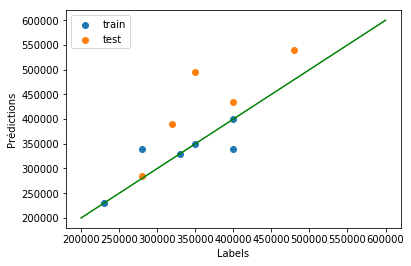

In [14]:
from matplotlib import pyplot as plt

plt.scatter(ytrain,trainpred)
plt.scatter(ytest,testpred)


plt.legend(["train","test"])
plt.xlabel("Labels")
plt.ylabel("Prédictions")

#Des prédictions parfaites devraient se situer sur la droite suivante (erreur de prédiction nulle)
plt.plot([200000,600000],[200000,600000], 'g')

Le modèle semble indiquer qu'une des maisons du testset est sous-évaluée: le modèle estime sa valeur plus haute que le prix auquel elle est vendue.

In [15]:
output = df.iloc[trainsize:]
output = output.assign(predictions = testpred)
output["delta"] = output["price"] - output["predictions"]
output

,address,price,rooms,surface,website,city,price_per_m2,price_per_room,predictions,delta
13,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan,Bruxelles,2666.666667,100000.000000,435000.0,-35000.0
14,"Rue de la Loi 53, Bruxelles",480000.0,5.0,170,immovlan,Bruxelles,2823.529412,96000.000000,540000.0,-60000.0
15,"Rue de Fer 27, Namur",280000.0,3.0,140,immoweb,Namur,2000.000000,93333.333333,285000.0,-5000.0
16,"Rue de Fer 28, Namur",320000.0,4.0,160,immoweb,Namur,2000.000000,80000.000000,390000.0,-70000.0
17,"Rue de Fer 29, Namur",350000.0,5.0,180,immovlan,Namur,1944.444444,70000.000000,495000.0,-145000.0


La maison à la Rue de Fer 29, Namur	serait donc fortement sous-évaluée. On remarque en l'occurrence qu'elle a un prix par pièce particulièrement faible.

In [16]:
df

,address,price,rooms,surface,website,city,price_per_m2,price_per_room
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb,Namur,2666.666667,100000.000000
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb,Bruxelles,3333.333333,133333.333333
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb,Fleurus,1031.250000,66000.000000
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb,Fleurus,1352.941176,76666.666667
10,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immovlan,Namur,1750.000000,87500.000000
12,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb,Bruxelles,2333.333333,93333.333333
13,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan,Bruxelles,2666.666667,100000.000000
14,"Rue de la Loi 53, Bruxelles",480000.0,5.0,170,immovlan,Bruxelles,2823.529412,96000.000000
15,"Rue de Fer 27, Namur",280000.0,3.0,140,immoweb,Namur,2000.000000,93333.333333
16,"Rue de Fer 28, Namur",320000.0,4.0,160,immoweb,Namur,2000.000000,80000.000000


# Importance des variables prédictives

On peut évaluer l'impact des variables prédictives sur la prédiction à partir de leur coefficient dans la régression linéaire. Néanmoins, pour que les coefficients soient comparables, il faut au préalable mettre à la même échelle les variable prédictives.

In [17]:
from sklearn.preprocessing import StandardScaler

#Scaling
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

#Entraînement
regressor.fit(Xtrain_scaled, ytrain)

#Prédictions
trainpred = regressor.predict(Xtrain_scaled)
testpred = regressor.predict(Xtest_scaled)

(features,regressor.coef_)

(['surface', 'rooms', 'city_Fleurus', 'city_Namur'],
 array([-68556.54600401,  93169.49906249, -28284.27124746, -16499.15822769]))

Le coefficient le plus grand en valeur absolue est le deuxième, et semble indiquer que c'est le nombre de pièces qui influence le plus le prix.

### La descente de gradient

In [18]:
from sklearn.linear_model import SGDRegressor

#On crée un objet de la classe LinearRegression
regressor = SGDRegressor(loss = "squared_loss", learning_rate = "constant", eta0 = 0.01, max_iter = 300)
regressor.fit(Xtrain_scaled, ytrain)
print(regressor.predict(Xtest_scaled)[0], ytest.values[0])

400501.3980016409 400000.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Leave-one-out validation
Lorsque l'ensemble de données est petit (comme dans cet exemple), il est intéressant d'utiliser une technique de tournante sur les données de test pour vérifier la qualité de l'algorithme choisi. Sur l'ensemble des données, on retient itérativement un sous-ensemble différent pour les données de test et on entraîne sur le reste. On peut parcourir itérativement toutes les données, pour ainsi tester au final l'algorithme sur l'ensemble des données.

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

testpredictions = []

input_features = features


for i in dataset.index:
  trainset = dataset[dataset.index!=i]
  testset = dataset.loc[i].to_frame().transpose()
  Xtrain, ytrain, Xtest, ytest = trainset[input_features], trainset["price"], testset[input_features], testset["price"]
  
  scaler = StandardScaler()
  Xtrain_scaled = scaler.fit_transform(Xtrain)
  Xtest_scaled = scaler.transform(Xtest)

  regressor.fit(Xtrain_scaled, ytrain)
  
  trainpred = regressor.predict(Xtrain_scaled)
  testpred = regressor.predict(Xtest_scaled)
  
  print(i, " - training mean error:", np.mean(np.abs(trainpred - ytrain)), "\n\t test mean error:", np.mean(np.abs(testpred - ytest)), "\n")
        
  testpredictions.append(testpred[0])
  

0  - training mean error: 22098.125063488646 
	 test mean error: 77821.22281258123 

2  - training mean error: 25104.519285743205 
	 test mean error: 77884.77240540402 

4  - training mean error: 28659.477992199907 
	 test mean error: 5660.842784011795 

6  - training mean error: 29405.876962469327 
	 test mean error: 14160.291673228785 

10  - training mean error: 27269.0642740404 
	 test mean error: 18530.956250332587 

12  - training mean error: 20549.725344569062 
	 test mean error: 105019.60931160749 

13  - training mean error: 28867.006073925317 
	 test mean error: 2572.9922593316296 

14  - training mean error: 28352.936624691436 
	 test mean error: 48679.38603771926 

15  - training mean error: 28739.099693246848 
	 test mean error: 9645.187519753468 

16  - training mean error: 27162.716411706748 
	 test mean error: 26122.83300332015 

17  - training mean error: 22628.270004464648 
	 test mean error: 77049.49936481268 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [20]:
testpredictions

[322178.7771874188,
 322115.227594596,
 335660.8427840118,
 244160.29167322878,
 331469.0437496674,
 385019.6093116075,
 402572.99225933163,
 431320.61396228074,
 289645.18751975347,
 346122.83300332015,
 427049.4993648127]

In [21]:
mean_absolute_error(dataset["price"],testpredictions)

42104.32667473664

Si les performances sur le test set sont bien plus mauvaises que sur les données d'entraînement, il est fort probable qu'on soit dans une situation d'**overfitting**: le modèle a appris "par coeur" ce qu'il fallait prédire pour chaque donnée du training set. Il ne se généralise donc pas bien sur de nouvelles données. Afin d'éviter ce problème, on peut soit:

* diminuer la complexité (le nombre de degrés de liberté, i.e. de paramètres) du modèle, soit en diminuant le nombre de caractéristique, soit en utilisant un algorithme plus simple.
* entraîner le modèle sur plus de données.

Si à l'inverse, les performances obtenues lors de l'entraînement sont faibles, on est en situation d'**underfitting**. Il faut alors au contraire augmenter la complexité au modèle et extraire des caractéristiques de meilleure qualité (ayant une relation pus forte avec le label à prédire).

Le dataset minimaliste utilisé ici a permis de présenter très simplement certains concepts de base du machine learning. Néanmoins, en pratique, l'utilisation du machine learning nécessite généralement de beaucoup plus grands ensemble de données, permettant notamment de développer des modèles plus complexes qu'une régression linéaire. Dans le Chapitre suivant, nous utiliserons un dataset réel et plus pertinent pour explorer quelques concepts fondamentaux du machine learning.
